In [1]:
from fastai.vision.all import *
import gradio as gr



/Users/joaquinlopez/miniconda3/envs/hf/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


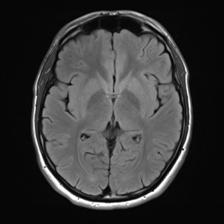

In [2]:
im = PILImage.create('images2.jpeg')

im2 = PILImage.create('normal_brain_mri.jpeg')

im2.thumbnail((224,224))

im2

In [3]:
learn = load_learner('brain_tumor_prediction_model.pkl')

learn.predict(im)

('yes', TensorBase(1), TensorBase([0.1362, 0.8638]))

In [4]:
categories = ('No tumor detected', 'A tumor was detected')

def classify_image(img):
    pred, pred_idx, probs = learn.predict(img)
    print (probs)
    return {categories[i]: float(probs[i]) for i in range(2)}
    # return dict(zip(categories, map(float, probs)))

classify_image(im2)

TensorBase([0.7014, 0.2986])


{'No tumor detected': 0.7013819217681885,
 'A tumor was detected': 0.2986180782318115}

In [5]:



image = gr.inputs.Image(shape=(224,224))
label = gr.outputs.Label()
examples = [
    'normal_brain_mri.jpeg', 'images2.jpeg'
]

gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples).launch(inline=False)


/Users/joaquinlopez/miniconda3/envs/hf/lib/python3.7/site-packages/gradio/inputs.py:258: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/Users/joaquinlopez/miniconda3/envs/hf/lib/python3.7/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/Users/joaquinlopez/miniconda3/envs/hf/lib/python3.7/site-packages/gradio/outputs.py:198: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/Users/joaquinlopez/miniconda3/envs/hf/lib/python3.7/site-packages/grad

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


TensorBase([0.0823, 0.9177])


TensorBase([0.7014, 0.2986])


TensorBase([0.0823, 0.9177])


Traceback (most recent call last):
  File "/Users/joaquinlopez/miniconda3/envs/hf/lib/python3.7/site-packages/gradio/routes.py", line 343, in run_predict
    event_id=event_id,
  File "/Users/joaquinlopez/miniconda3/envs/hf/lib/python3.7/site-packages/gradio/blocks.py", line 1016, in process_api
    fn_index, inputs, iterator, request, event_id
  File "/Users/joaquinlopez/miniconda3/envs/hf/lib/python3.7/site-packages/gradio/blocks.py", line 834, in call_function
    fn, *processed_input, limiter=self.limiter
  File "/Users/joaquinlopez/miniconda3/envs/hf/lib/python3.7/site-packages/anyio/to_thread.py", line 32, in run_sync
    func, *args, cancellable=cancellable, limiter=limiter
  File "/Users/joaquinlopez/miniconda3/envs/hf/lib/python3.7/site-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "/Users/joaquinlopez/miniconda3/envs/hf/lib/python3.7/site-packages/anyio/_backends/_asyncio.py", line 867, in run
    result = context